# Machine Learning

---

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score

import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

## Step 1: Decision making: Which is the best dataset



In [126]:
# Train data frames
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# Test data frames
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [127]:
train_dicts = {
  "X_train_with_outliers_sel": X_train_with_outliers_sel,
  "X_train_without_outliers_sel": X_train_without_outliers_sel,
  "X_train_with_outliers_norm_sel": X_train_with_outliers_norm_sel,
  "X_train_without_outliers_norm_sel": X_train_without_outliers_norm_sel,
  "X_train_with_outliers_minmax_sel": X_train_with_outliers_minmax_sel,
  "X_train_without_outliers_minmax_sel": X_train_without_outliers_minmax_sel
}

test_dicts = {
  "X_test_with_outliers_sel": X_test_with_outliers_sel,
  "X_test_without_outliers_sel": X_test_without_outliers_sel,
  "X_test_with_outliers_norm_sel": X_test_with_outliers_norm_sel,
  "X_test_without_outliers_norm_sel": X_test_without_outliers_norm_sel,
  "X_test_with_outliers_minmax_sel": X_test_with_outliers_minmax_sel,
  "X_test_without_outliers_minmax_sel": X_test_without_outliers_minmax_sel
}

train_dfs = [
  X_train_with_outliers_sel,
  X_train_without_outliers_sel,
  X_train_with_outliers_norm_sel,
  X_train_without_outliers_norm_sel,
  X_train_with_outliers_minmax_sel,
  X_train_without_outliers_minmax_sel
]
test_dfs = [
  X_test_with_outliers_sel,
  X_test_without_outliers_sel,
  X_test_with_outliers_norm_sel,
  X_test_without_outliers_norm_sel,
  X_test_with_outliers_minmax_sel,
  X_test_without_outliers_minmax_sel
]

print(f"X_train_with_outliers_sel shape: {X_train_with_outliers_sel.shape} ")
print(f"X_train_without_outliers_sel shape: {X_train_without_outliers_sel.shape} ")
print(f"X_train_with_outliers_norm_sel shape: {X_train_with_outliers_norm_sel.shape} ")
print(f"X_train_without_outliers_norm_sel shape: {X_train_without_outliers_norm_sel.shape} ")
print(f"X_train_with_outliers_minmax_sel shape: {X_train_with_outliers_minmax_sel.shape} ")
print(f"X_train_without_outliers_minmax_sel shape: {X_train_without_outliers_minmax_sel.shape}\n ")

print(f"X_test_with_outliers_sel shape: {X_test_with_outliers_sel.shape} ")
print(f"X_test_without_outliers_sel shape: {X_test_without_outliers_sel.shape} ")
print(f"X_test_with_outliers_norm_sel shape: {X_test_with_outliers_norm_sel.shape} ")
print(f"X_test_without_outliers_norm_sel shape: {X_test_without_outliers_norm_sel.shape} ")
print(f"X_test_with_outliers_minmax_sel shape: {X_test_with_outliers_minmax_sel.shape} ")
print(f"X_test_without_outliers_minmax_sel shape: {X_test_without_outliers_minmax_sel.shape}\n ")

X_train_with_outliers_sel shape: (614, 8) 
X_train_without_outliers_sel shape: (614, 8) 
X_train_with_outliers_norm_sel shape: (614, 8) 
X_train_without_outliers_norm_sel shape: (614, 8) 
X_train_with_outliers_minmax_sel shape: (614, 8) 
X_train_without_outliers_minmax_sel shape: (614, 8)
 
X_test_with_outliers_sel shape: (154, 8) 
X_test_without_outliers_sel shape: (154, 8) 
X_test_with_outliers_norm_sel shape: (154, 8) 
X_test_without_outliers_norm_sel shape: (154, 8) 
X_test_with_outliers_minmax_sel shape: (154, 8) 
X_test_without_outliers_minmax_sel shape: (154, 8)
 


In [128]:
results = []

for df_index in range(len(train_dfs)):
  model = DecisionTreeClassifier(random_state = 42) # Model initialization and training

  train_df = train_dfs[df_index]
  model.fit(train_df, y_train)

  '''y_train_pred = model.predict(train_df)'''
  y_test_pred = model.predict(test_dfs[df_index]) # Model prediction

  results.append(
    {
        "index": df_index,
        "train_df": list(train_dicts.keys())[df_index],
        "Accuracy_score": accuracy_score(y_test, y_test_pred)
  })

resultados = sorted(results, key = lambda x: x["Accuracy_score"], reverse = True)
resultados

[{'index': 0,
  'train_df': 'X_train_with_outliers_sel',
  'Accuracy_score': 0.7467532467532467},
 {'index': 2,
  'train_df': 'X_train_with_outliers_norm_sel',
  'Accuracy_score': 0.7467532467532467},
 {'index': 4,
  'train_df': 'X_train_with_outliers_minmax_sel',
  'Accuracy_score': 0.7467532467532467},
 {'index': 1,
  'train_df': 'X_train_without_outliers_sel',
  'Accuracy_score': 0.7402597402597403},
 {'index': 3,
  'train_df': 'X_train_without_outliers_norm_sel',
  'Accuracy_score': 0.7402597402597403},
 {'index': 5,
  'train_df': 'X_train_without_outliers_minmax_sel',
  'Accuracy_score': 0.7402597402597403}]

In [129]:
print (f"The best train dataframe is |{resultados[0]['train_df']}|.\n\
=======================================================      \n\
| Accuracy score: {resultados[0]['Accuracy_score']}   |\n\
========================================")

The best train dataframe is |X_train_with_outliers_sel|.
| Accuracy score: 0.7467532467532467   |


## Step 2: Model hyperparameters optimization

- ### 2.1 Grid SearchCV

In [174]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(train_dfs[0], y_train)
y_pred = model.predict(test_dfs[0])

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.7467532467532467

In [175]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "criterion": ["entropy", "gini"], # 'gini' es generalmente más rápido, mientras que, 'entropy' puede ser preferible si se busca una medida basada en la información
    "max_depth": [8, 10, 12, 14, 16], # Significa que el árbol no tendrá más de 12 niveles. Valor mayor = complejo / Valor menor = simplificado.
    "random_state": [42], # To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer.
    "splitter": ["best", "random"], # The strategy used to choose the split at each node
        # 'best' (elige la mejor división) tiende a dar un rendimiento más alto 
        # & 
        # 'random' (elige una división aleatoria) puede ser más rápido y útil para modelos como Random Forest.
    "min_weight_fraction_leaf": [0.085, 0.09, 0.095, 0.1, 0.15, 0.2]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 6)
grid

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 10, 12, 14, 16],
                         'min_weight_fraction_leaf': [0.085, 0.09, 0.095, 0.1,
                                                      0.15, 0.2],
                         'random_state': [42], 'splitter': ['best', 'random']},
             scoring='accuracy')

In [168]:
grid.fit(train_dfs[0], y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_weight_fraction_leaf': 0.095, 'random_state': 42, 'splitter': 'best'}


In [179]:
model_grid = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 8,
                                    min_weight_fraction_leaf = 0.095,
                                    random_state = 42,
                                    splitter = 'best')
model_grid.fit(train_dfs[0], y_train)

y_pred = model_grid.predict(test_dfs[0])

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.7727272727272727

In [171]:
print(f"We have an increment of {round(((grid_accuracy - base_accuracy)/base_accuracy)*100, 2)}%")

We have an increment of 3.48%


In [ ]:
decision_tree = export_text(model_grid, feature_names = train_dfs[0].columns)
print(decision_tree)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- Insulin <= 46.50
|   |   |   |   |--- class: 0
|   |   |   |--- Insulin >  46.50
|   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- Glucose <= 100.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  100.50
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- BMI <= 29.95
|   |   |--- class: 0
|   |--- BMI >  29.95
|   |   |--- Glucose <= 159.00
|   |   |   |--- class: 1
|   |   |--- Glucose >  159.00
|   |   |   |--- class: 1



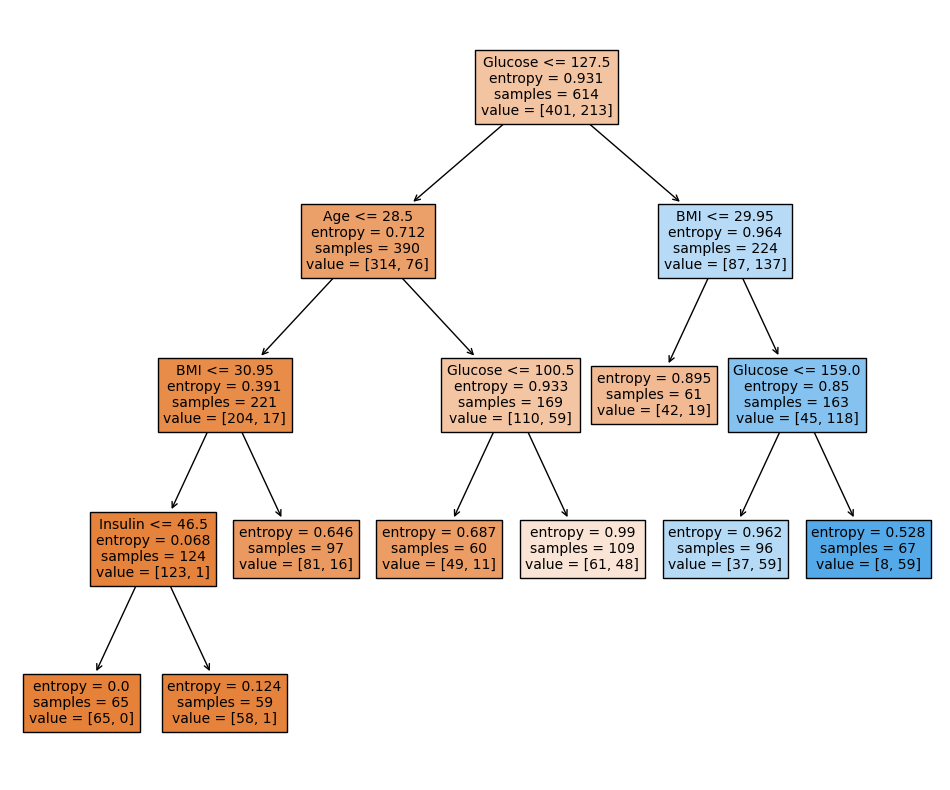

In [173]:
plt.figure(figsize=(12,10))

plot_tree(model_grid, 
            feature_names = train_dfs[0].columns, 
                filled = True
)

plt.show()